# 1. BUSINESS_PROBLEM

## LOAN PREDICTION

About Dataset
About the data and what to do…

publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here.

Here are what the columns represent:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# 2. EXPLORE DATA

## 2.1 INPUT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/mac/Desktop/Project/loan_predict/loan_data.csv'

df = pd.read_csv(path)

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
df[['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']].describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [4]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

## 2.2. CLEAN DATA

In [5]:
# chuyển hoá trường thông tin purpose sang dạng số nguyên

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_en= LabelEncoder()

# fit and transfoam the labelencoding
df['purpose']= label_en.fit_transform(df['purpose']) # encode purpose column

df['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

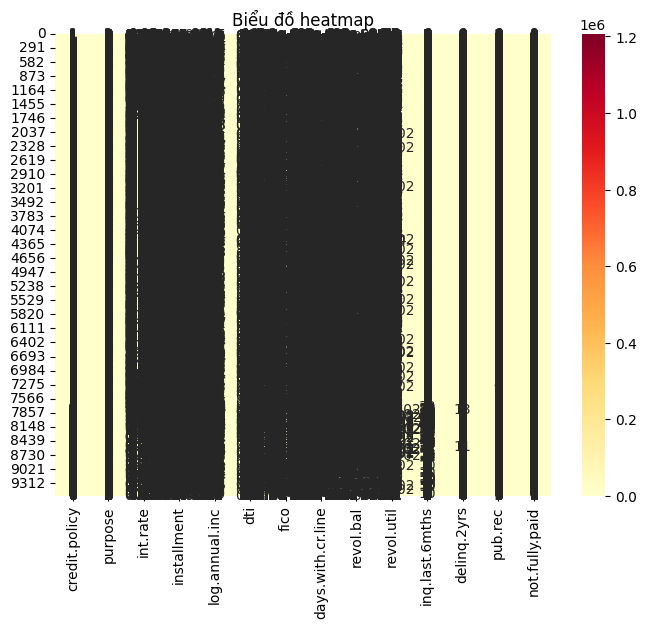

In [7]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlOrRd')
plt.title('Biểu đồ heatmap')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


### Dữ liệu đầy đủ nên dễ dàng cho việc trực quan hoá và phân tích dữ liệu

## 2.3. Vizual data

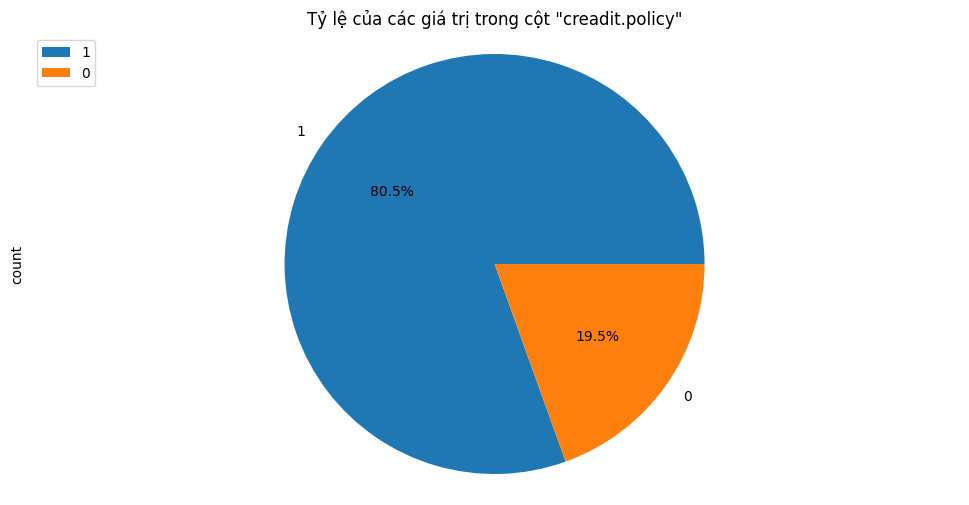

In [9]:
# xem số lượng credit trong tập dữ liệu

a = df['credit.policy'].value_counts()

# vẽ biẻu đồ tròn

plt.figure(figsize = (12,6))
a.plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Tỷ lệ của các giá trị trong cột "creadit.policy"')
plt.axis('equal')
plt.legend(labels=a.index, loc='upper left')
plt.show()

Số lượng tham gia chính sách tín dụng chiếm tới 80,5% trên tổng mẫu khảo sát. Cần đánh giá cụ thể xem mục dích vay trong tập 80,5% kia.

In [10]:
# xem mục đích trong tập 80,5%

df_vi = df[df['credit.policy'] == 1]
df_vi.shape

(7710, 14)

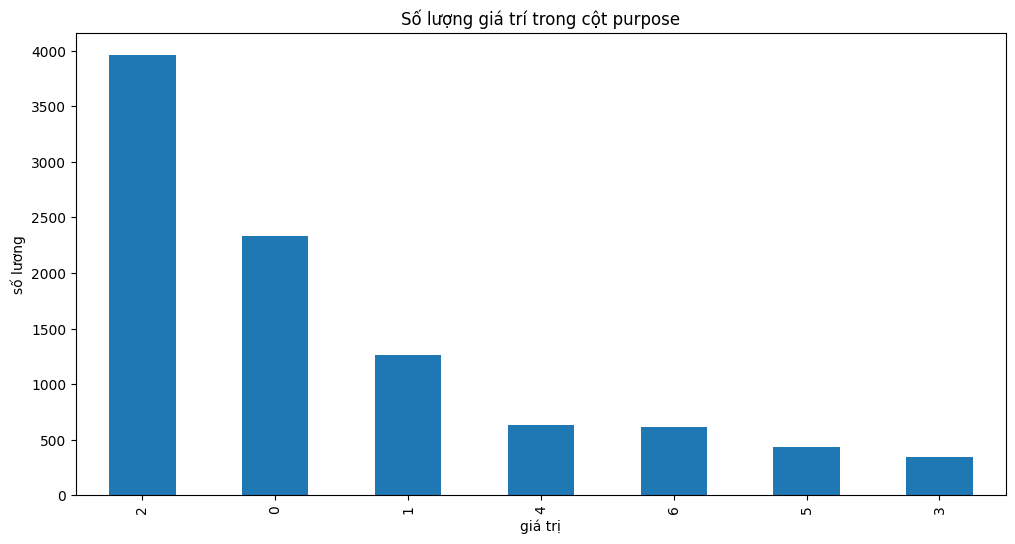

In [11]:
b = df['purpose'].value_counts()


#trực quan hoá lý do

plt.figure(figsize = (12,6))
b.plot(kind = 'bar')
plt.title("Số lượng giá trí trong cột purpose")
plt.xlabel('giá trị')
plt.ylabel('số lương')
plt.show()

### - Món nợ cố định chiếm nhiều nhất 

### - Thẻ tín dụng, vấn đề khác sau món nợ cố định


In [12]:
df_vi.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7710.0,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,1.0,1.958625,0.118754,325.079200,10.942680,12.298684,717.356031,4682.468461,13798.404280,45.312677,0.997536,0.143191,0.055123,0.131518
std,0.0,1.685778,0.025571,205.611447,0.585371,6.627485,36.630697,2429.932117,16878.560424,28.821751,1.152580,0.469033,0.241491,0.337987
min,1.0,0.000000,0.060000,15.690000,8.294050,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.097600,166.500000,10.596535,7.130000,687.000000,2970.010417,3334.250000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2.000000,0.118900,278.605000,10.933107,12.380000,712.000000,4230.041667,8707.500000,44.300000,1.000000,0.000000,0.000000,0.000000
75%,1.0,2.000000,0.135700,447.747500,11.289819,17.520000,742.000000,5789.958333,17579.750000,68.675000,2.000000,0.000000,0.000000,0.000000
max,1.0,6.000000,0.212100,918.020000,14.528354,29.420000,827.000000,17616.000000,149527.000000,99.900000,8.000000,6.000000,4.000000,1.000000


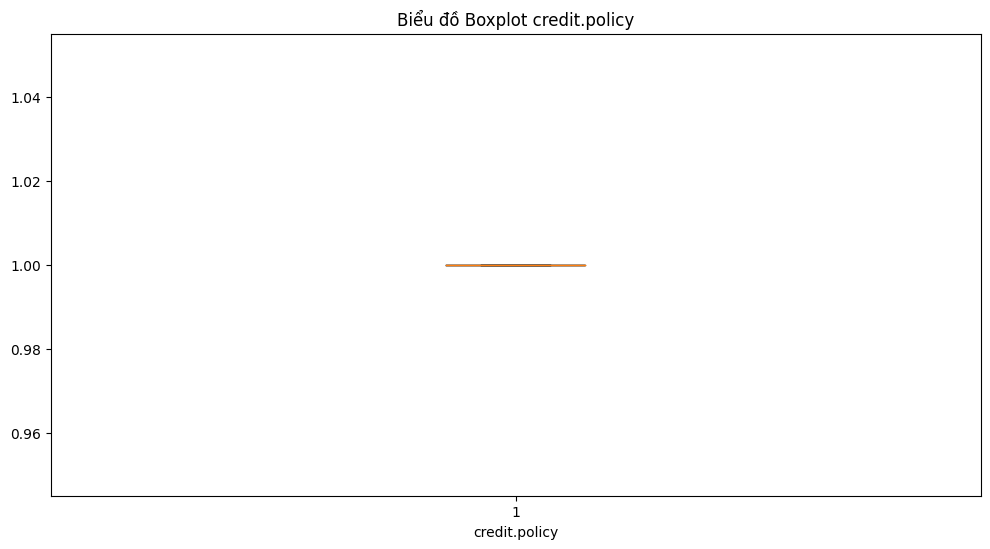

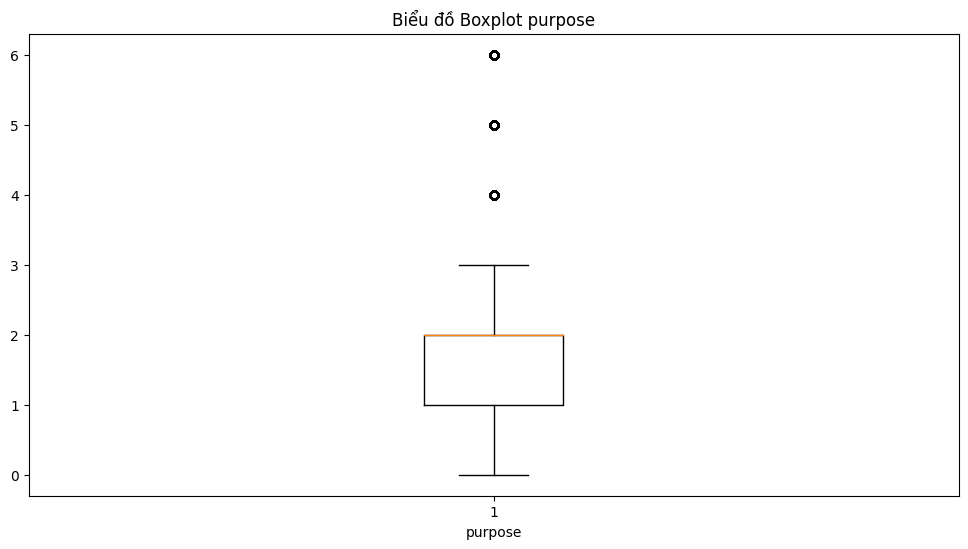

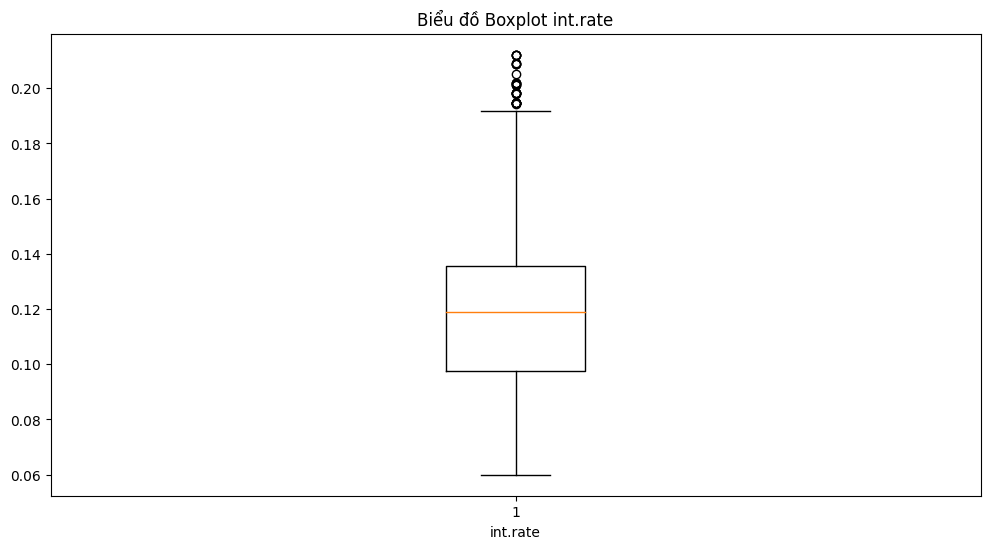

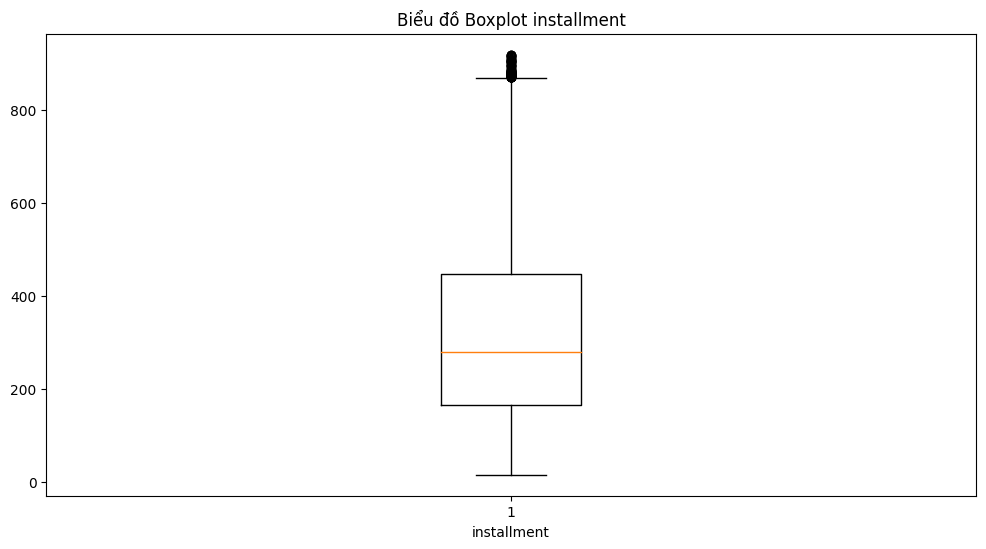

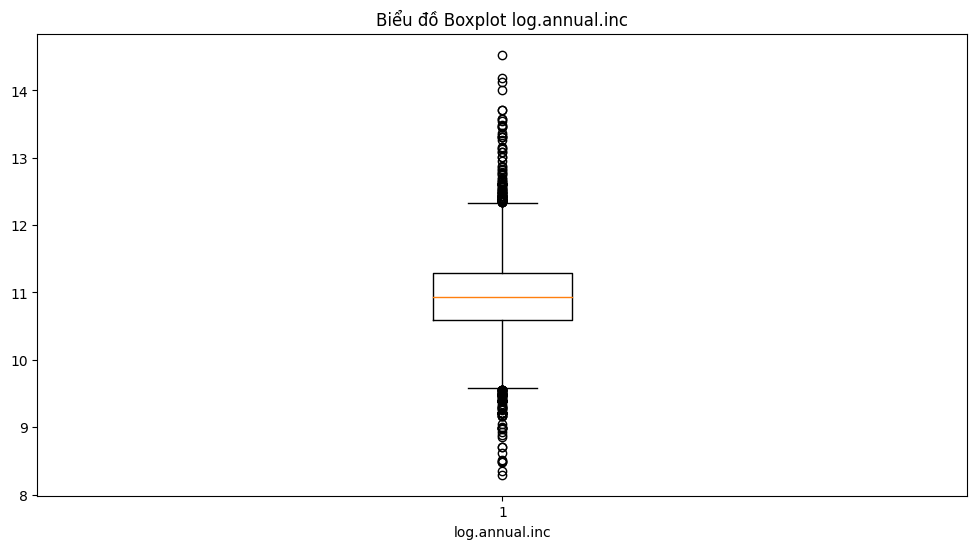

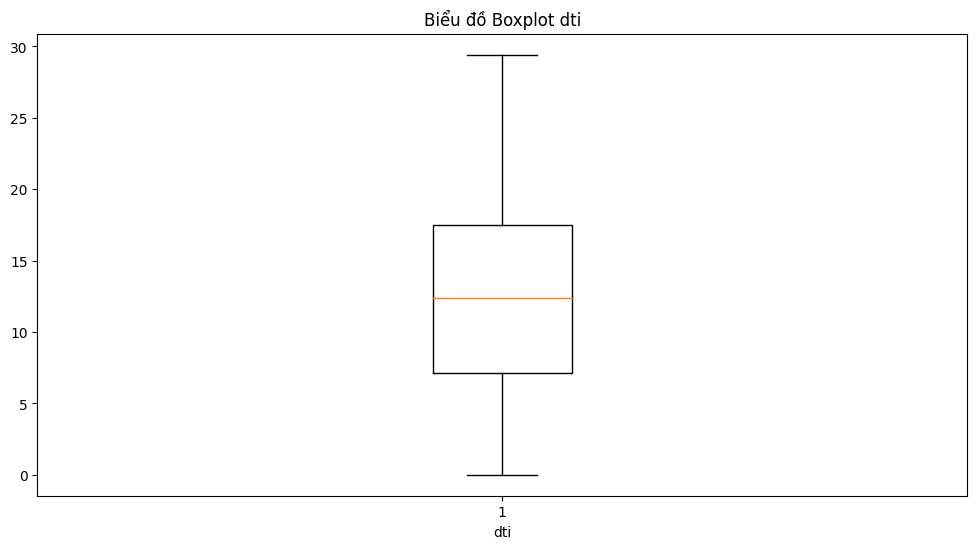

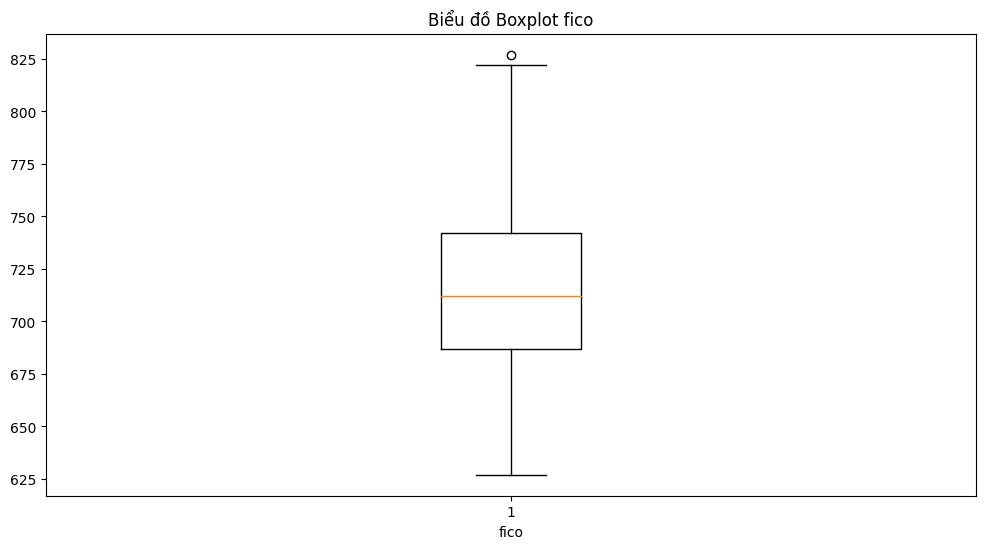

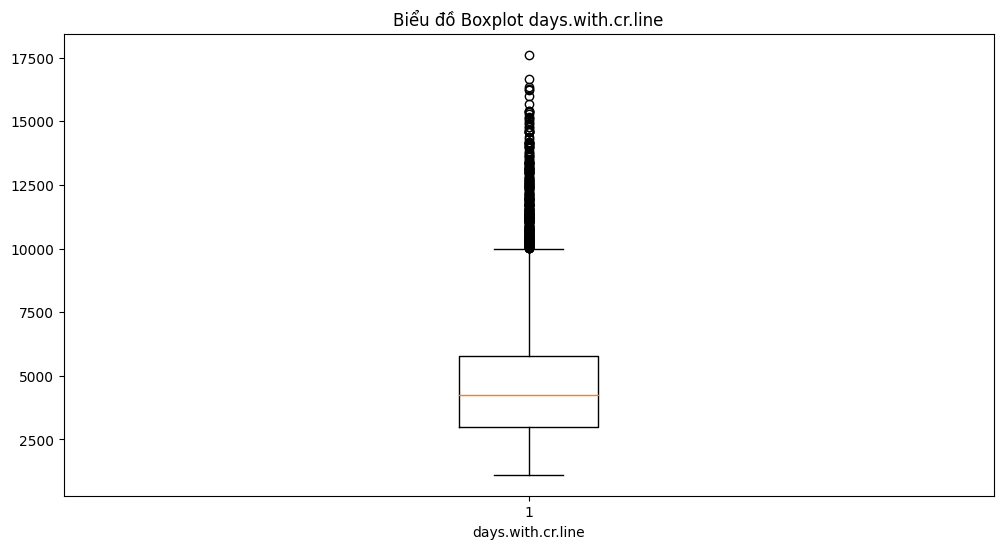

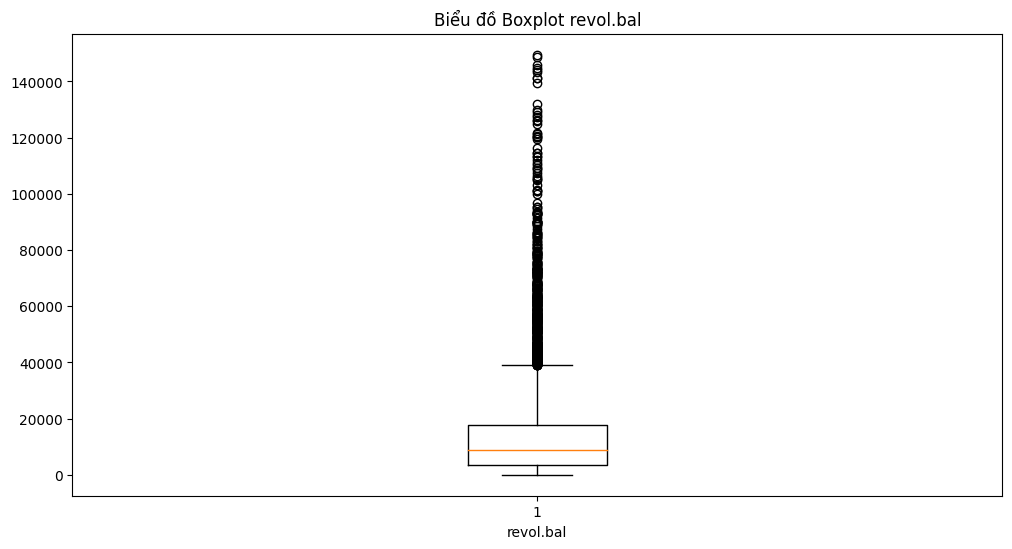

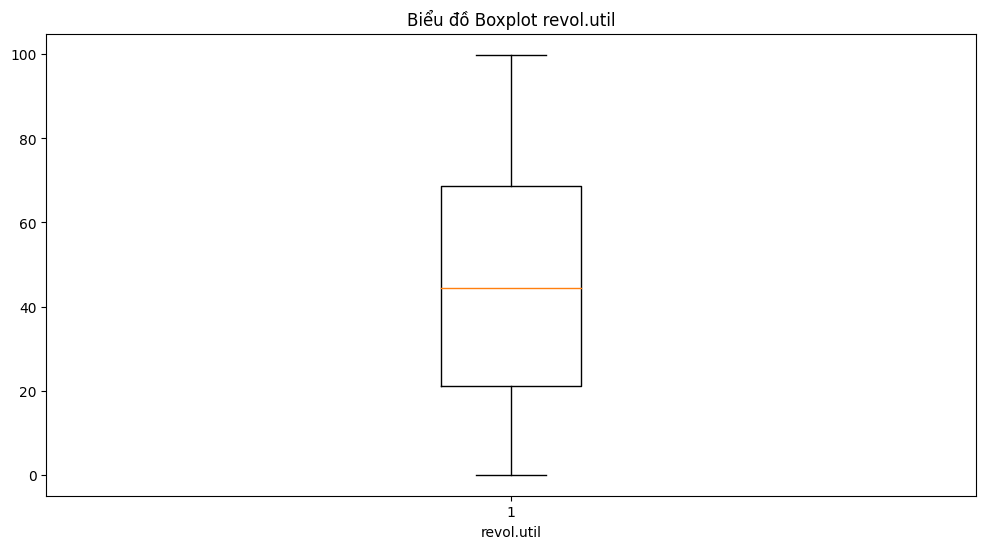

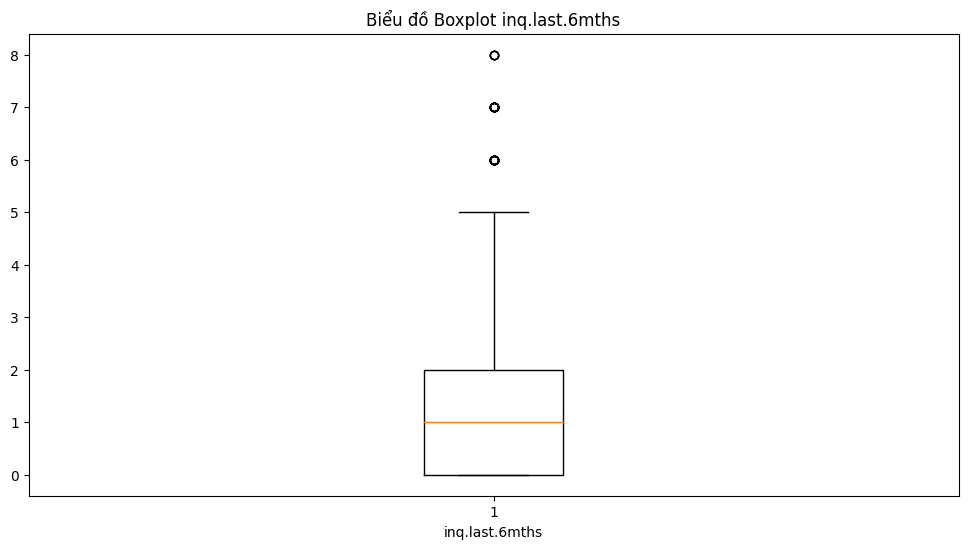

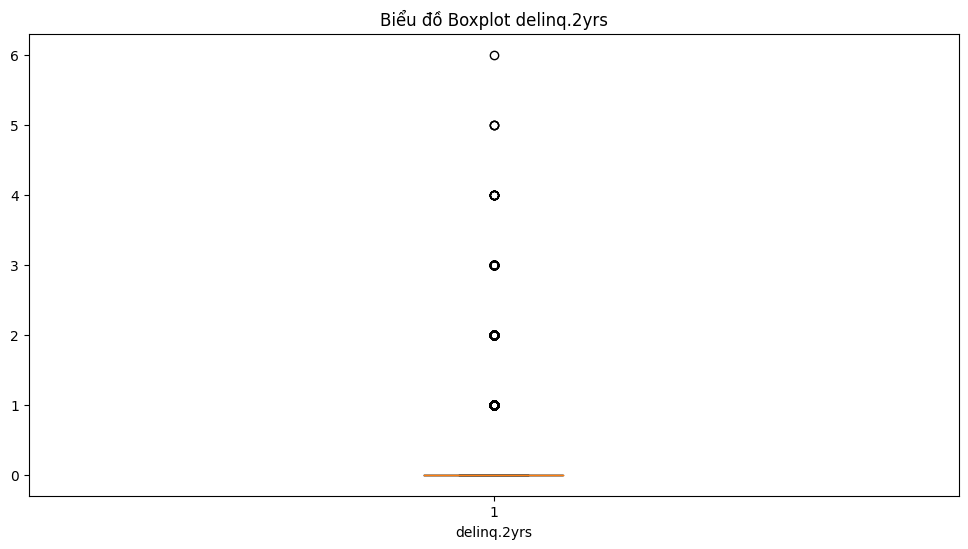

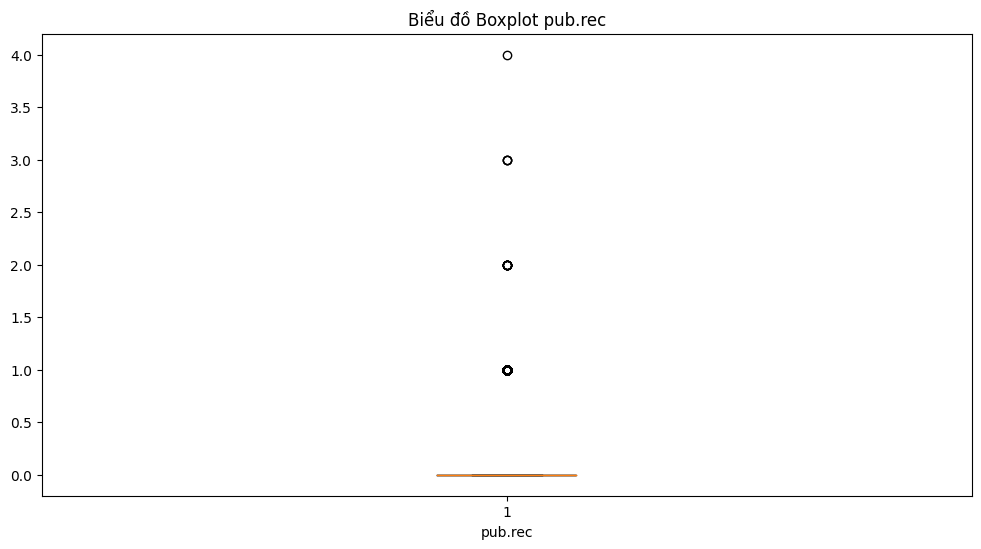

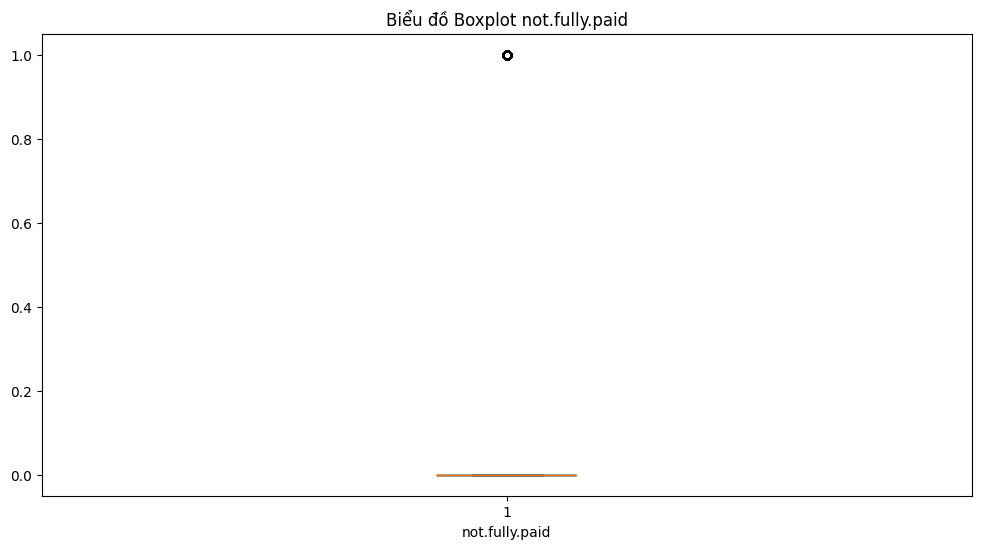

In [13]:
# vẽ biểu đồ boxplot

# Vẽ từng biểu đồ boxplot cho mỗi cột
for column in df_vi.columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot(df_vi[column])
    plt.title(f"Biểu đồ Boxplot {column}")
    plt.xlabel(column)
    plt.show()

## log.annual.inc,  days.with.cr.line, revol.bal có nhiều outliner cần chú ý và làm sạch outliner 



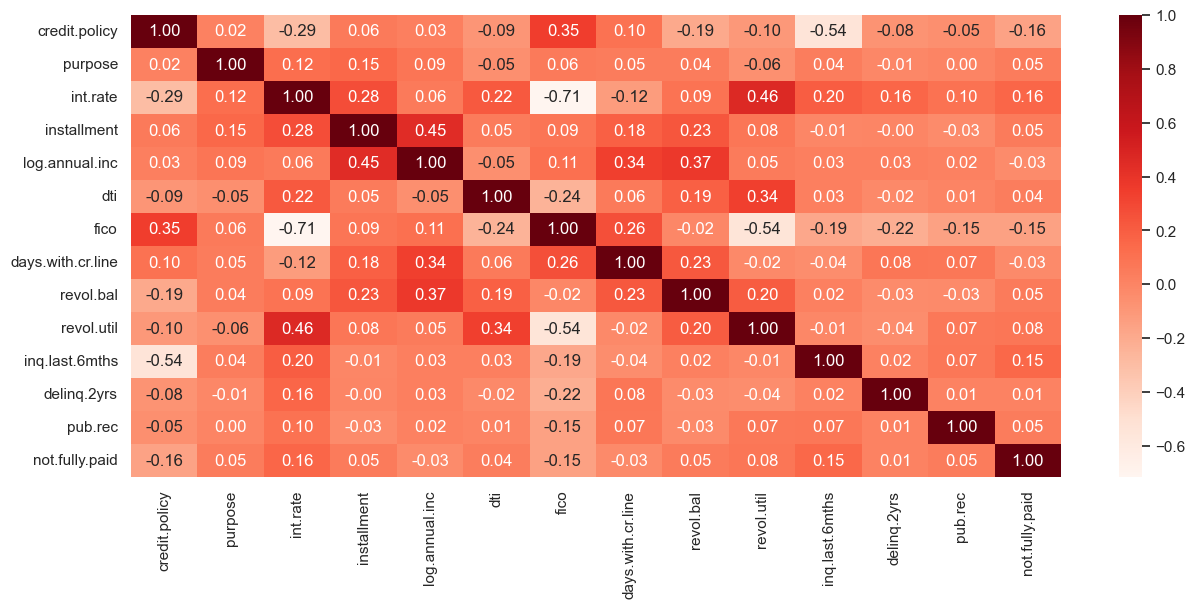

In [14]:
# xem độ tương quan giữa các chỉ số

corr = df.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

## Biến fico có tương qundương mạnh tới biến creadit.policy. Có thể dễ hiểu khi fico tăng thì creadit.policy tăng, có nghĩa là một yếu tố quan trọng đánh giá có thể creadit.policy hay không.

## Biến installment và biến log.annual.inc có tương quan dương tới biến creadit.policy nhưng yếu. Installment có thể ảnh hưởng tới creadit.policy nhưng không phải yếu tố chính

## Biến revol.util có tương quan dương tới biến creadit.policy nhưng không cao. Chứng tỏ revol.util có thể ảnh hưởng tới crradit.policy. Đây là yếu tố ảnh hưởng tới việc creadit.policy hay không.

>>> Từ biểu đồ heatmap ta có thể hiểu rằng mỗi quan hệ giữa biến creadit.policy tới các biến còn lại. Tuy mức độ tưởng quan khác nhau nhưng các biến fico và biến revol.util có mối tương quan mạnh tới biến creadit.policy
>>> 

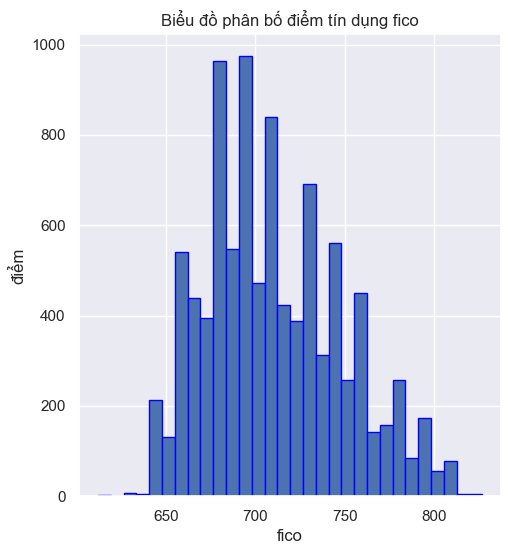

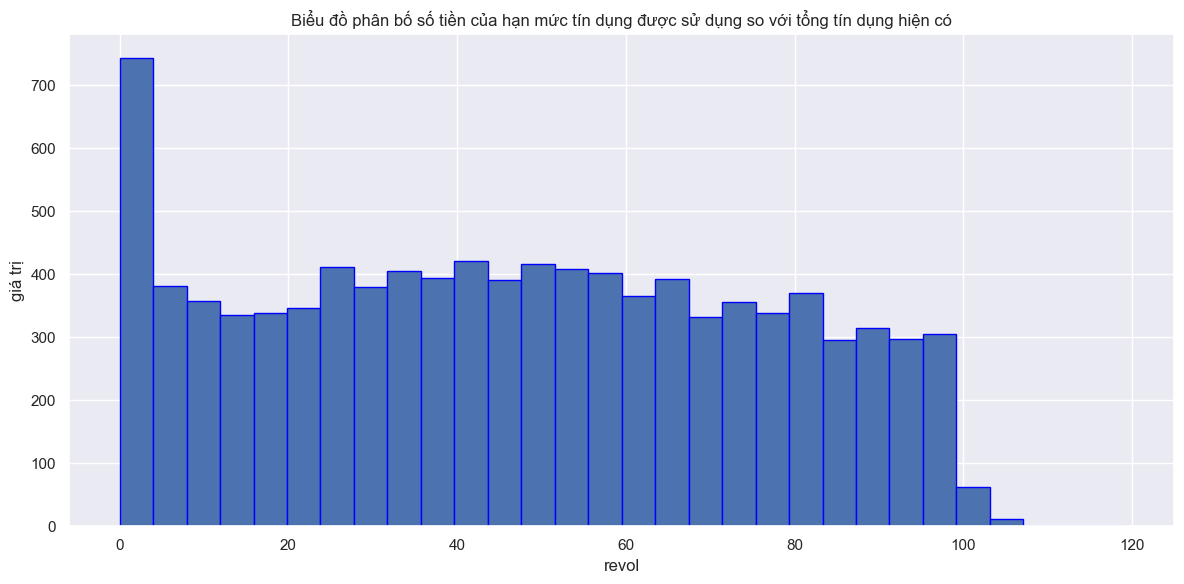

In [15]:
# xem độ phân bố dữ liệu các biến feature

# dliệu fico
fico = df['fico']

# dữ liệu revol.util

revol = df['revol.util']


# vẽ biểu đồ

# Tạo subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.hist(fico,bins = 30, edgecolor='blue')
plt.xlabel('fico')
plt.ylabel('điểm')
plt.title('Biểu đồ phân bố điểm tín dụng fico')

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)  
plt.hist(revol,bins = 30, edgecolor='blue')
plt.xlabel('revol')
plt.ylabel('giá trị')
plt.title('Biểu đồ phân bố số tiền của hạn mức tín dụng được sử dụng so với tổng tín dụng hiện có')

#hiển thị biểu đồ
plt.tight_layout()
plt.show()

### - Điểm tin dụng fico phân bố chủ yếu từ 680 - 730 điểm. Cho thấy người có một lịch sử sử dụng tín dụng rất tốt và nên khai  thác tập khách hàng này (Một điểm FICO trên 650 cho thấy người có một lịch sử tín dụng rất tốt, trong khi điểm dưới 620 cho thấy khó khăn hơn trong việc tài chính. Điểm FICO là một chỉ số đo lường tín dụng trong khoảng từ 300 đến 850.)

### - Hạn mức tín dụng khả dụng trải dài từ 0 đến 100 triệu

## 4. ML  Modelling  

### Feature  selection

dataset: df

X  : df(feature)

y  : df(predict)

### X,y  >>> X_train,yy_train, X_valid, y_valid

In [18]:
X = df[['fico','revol.util']]
y = df['credit.policy']

X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

### Training model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(X,y, train_size = 0.8, test_size = 0.2,random_state = 0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)
#fit training data input model
dt_model.fit(X_train,y_train)
# Dự đoán giá trị cho dữ liệu kiểm tra
y_pred = dt_model.predict(X_valid)
# check dự đoán và dữ liệu thực
pd.DataFrame({'y': y_valid, 'y_pred': y_pred})

,y,y_pred
3343,1,1.000000
9,1,1.000000
1741,1,1.000000
5160,1,1.000000
7760,0,0.000000
...,...,...
2113,1,1.000000
9282,0,1.000000
2434,1,0.000000
7287,1,0.833333


In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_valid)
rf_model_pred.shape

(1916,)

### Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Tính toán Confusion matrix
cm = confusion_matrix(y_valid, rf_model_pred)
print("Confusion Matrix:")
print(cm)

# Tính toán classification report
cr = classification_report(y_valid, rf_model_pred)
print("Classification Report:")
print(cr)

# Tính toán độ chính xác
accuracy = accuracy_score(y_valid, rf_model_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 156  223]
 [ 180 1357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.41      0.44       379
           1       0.86      0.88      0.87      1537

    accuracy                           0.79      1916
   macro avg       0.66      0.65      0.65      1916
weighted avg       0.78      0.79      0.78      1916

Accuracy: 0.7896659707724426


Trong Confusion Matrix (ma trận nhầm lẫn), các giá trị được sắp xếp như sau:

- True Negative (TN): 156 (số lượng mẫu được dư đoán đúng là 0 và thực tế là 0)
- False Negative (FN): 180 (số lượng mẫu được dự đoán sai là 0 nhưng thực tế là 1)
- True Positive (TP): 223 (số lượng mẫu được dự đoán đúng là 1 nhưng thực tế là 1)
- False Positive (FP): 1357 (số lượng mẫu được dự đoán sai là 1 nhưng thực tế là 0)

Trong classification report, các thông số được tính toán cho từng lớp như sau:
 
- Precision: Độ chính xác của dự đoán cho từng lớp. Precision được tính bằng công thức TP / (TP + FP).

  + Đối với lớp 0, độ chính xác là 0.46 ,
  + Đối với lớp 1, độ chính xác là 0.86 .
- Recall: Tỷ lệ mẫu dự đoán chính xác cho từng lớp. Recall được tính bằng công thức TP / (TP + FN).

  + Đối với lớp 0, tỷ lệ dự đoán chính xác là 0.41 ,
  + Đối với lớp 1, tỷ lệ dự đoán chính xác là 0.88 .
- F1-score: Trung bình điều hòa giữa precision và recall cho từng lớp. F1-score được tính bằng công thức 2 * (Precision * Recall) / (Precision + Recall).

  + Đối với lớp 0, F1-score là 0.44,
  + Đối với lớp 1, F1-score là 0.87. 
- Support: Số lượng mẫu trong từng lớp. Lớp 0 có 379 mẫu, và lớp 1 có 1537 mẫu. Accuracy: 0.7896659707724426
Độ chính xác (accuracy) được tính bằng tỷ lệ giữa số lượng dự đoán đúng và tổng số điểm dữ liệu. Trong trường hợp này, độ chính xác là 0.9452054794520548, tức là có khoảng 94.52% dự đoán đúng trên tổng số 1022 điểm dữ liệu kiểm tra.
 

### Đánh giá mô hình

mô hình có hiệu suất tốt trong việc dự đoán cho lớp 1 (nhãn 1) nhưng không hiệu quả cho lớp 0 (nhãn 0). Cần tiếp tục cải thiện mô hình để đạt được hiệu suất tốt đồng thời cho cả hai lớp